### 📍 Import Libraries, Read, and Join CitiBike Data

In this step, we import all necessary libraries, read all monthly CitiBike CSV files from the extracted folder, and join them into a single DataFrame.

To do this effectively, we:
- Use the `os` library to loop through all `.csv` files in the folder.
- Use `pandas.read_csv()` with `low_memory=False` to avoid dtype warnings.
- Use `pd.concat()` to combine all monthly datasets into one unified DataFrame.

This method is scalable, clean, and efficient—especially useful when working with large volumes of monthly trip data.


In [1]:
import pandas as pd
import numpy as np
import os
import requests
import json
from datetime import datetime


In [2]:
import os

folderpath = 'Data/2022-citibike-tripdata'

# Check the files in that folder
print("Files inside folder:")
print(os.listdir(folderpath))


Files inside folder:
['202208-citibike-tripdata_3.csv', '202207-citibike-tripdata_2.csv', '202211-citibike-tripdata', '202207-citibike-tripdata_3.csv', '202208-citibike-tripdata_2.csv', '202209-citibike-tripdata.zip', '202207-citibike-tripdata_1.csv', '202208-citibike-tripdata_1.csv', '202208-citibike-tripdata', '202201-citibike-tripdata.zip', '202210-citibike-tripdata_1.csv', '.DS_Store', '202210-citibike-tripdata', '202207-citibike-tripdata_4.csv', '202208-citibike-tripdata_4.csv', '202203-citibike-tripdata_2.csv', '202210-citibike-tripdata_2.csv', '202203-citibike-tripdata.zip', '202209-citibike-tripdata', '202203-citibike-tripdata_1.csv', '202210-citibike-tripdata_3.csv', '202205-citibike-tripdata.zip', '202207-citibike-tripdata.zip', '202204-citibike-tripdata_1.csv', '202211-citibike-tripdata.zip', '202212-citibike-tripdata', '202204-citibike-tripdata_2.csv', '202204-citibike-tripdata_3.csv', '202211-citibike-tripdata_3.csv', '202202-citibike-tripdata_1.csv', '202211-citibike-trip

In [3]:
import os
import pandas as pd

# ✅ Set folder path where the "Data" folder is
folderpath = '/Users/muhammaddildar/Desktop/citibike_2022_dashboard/Data'

# ✅ Step 1: Recursively find ALL CSVs inside all subfolders
filepaths = []
for root, dirs, files in os.walk(folderpath):
    for file in files:
        if file.endswith('.csv'):
            filepaths.append(os.path.join(root, file))

# ✅ Step 2: Read CSVs into list
df_list = []
for fp in filepaths:
    try:
        df = pd.read_csv(fp, low_memory=False)
        df_list.append(df)
    except Exception as e:
        print(f"⚠️ Skipped file: {fp} — Error: {e}")

# ✅ Step 3: Check and concat
if not df_list:
    print("❌ Still no CSVs found.")
else:
    citibike_data = pd.concat(df_list, ignore_index=True)
    print(f"✅ Total rows loaded: {citibike_data.shape[0]}")

    # ✅ Step 4: Sample max 10,000 rows
    sample_size = min(10000, citibike_data.shape[0])
    trip_sample = citibike_data.sample(n=sample_size, random_state=42)

    # ✅ Step 5: Save sample
    trip_sample.to_csv('citibike_trip_sample.csv', index=False)
    print(f"✅ Saved sample with {sample_size} rows to 'citibike_trip_sample.csv'")

    # ✅ Optional: Free memory
    del citibike_data


✅ Total rows loaded: 59677612
✅ Saved sample with 10000 rows to 'citibike_trip_sample.csv'


### This code loops through all .csv files in the specified folder using the os library.
### It reads each file into a DataFrame using pandas, with low_memory set to False to avoid dtype warnings.
### All individual DataFrames are then combined into one large DataFrame using pd.concat.
### This method is efficient for joining multiple monthly trip data files into a single dataset.


## 📥 Register and Download Weather Data from NOAA

In this step, we:

- Register for an account at the [NOAA Web App](https://www.ncdc.noaa.gov/cdo-web/token) to obtain a **personal API token**.
- Use the NOAA API to access **daily average temperature (TAVG)** data for the **New York LaGuardia Airport weather station** (`GHCND:USW00094728`) for the year **2022**.
- Structure the API request with appropriate parameters including `datasetid`, `datatypeid`, `stationid`, `startdate`, and `enddate`.
- Authenticate the request using the NOAA token by passing it through the `headers`.
- Convert the response to a JSON format, load it into a DataFrame, and **export it as a `.csv` file** for later use in our CitiBike dashboard analysis.


In [4]:
from noaa_sdk import noaa

n = noaa.NOAA()


In [5]:
import requests
import json
import pandas as pd

# NOAA token (already set by you)
headers = {
    'token': 'IBNqeAElGXNgHZDudJvKDLVixSUMeJUq'
}

# URL to fetch daily max temperature (TAVG) for 2022 at LaGuardia Airport
url = (
    "https://www.ncdc.noaa.gov/cdo-web/api/v2/data?"
    "datasetid=GHCND"
    "&datatypeid=TAVG"
    "&stationid=GHCND:USW00014732"
    "&startdate=2022-01-01"
    "&enddate=2022-12-31"
    "&limit=1000"
)

# Make the request
response = requests.get(url, headers=headers)

# Check the response status
print("Status code:", response.status_code)

# Convert to JSON
data = response.json()

# Preview raw JSON
print(json.dumps(data, indent=2))

# Check if results exist
if "results" in data:
    # Convert to DataFrame
    df = pd.DataFrame(data["results"])
    
    # Save to CSV
    df.to_csv("laguardia_2022_tavg.csv", index=False)
    
    # Preview the DataFrame
    print(df.head())
else:
    print("No results found in the response.")


Status code: 200
{
  "metadata": {
    "resultset": {
      "offset": 1,
      "count": 365,
      "limit": 1000
    }
  },
  "results": [
    {
      "date": "2022-01-01T00:00:00",
      "datatype": "TAVG",
      "station": "GHCND:USW00014732",
      "attributes": "H,,S,",
      "value": 116
    },
    {
      "date": "2022-01-02T00:00:00",
      "datatype": "TAVG",
      "station": "GHCND:USW00014732",
      "attributes": "H,,S,",
      "value": 114
    },
    {
      "date": "2022-01-03T00:00:00",
      "datatype": "TAVG",
      "station": "GHCND:USW00014732",
      "attributes": "H,,S,",
      "value": 14
    },
    {
      "date": "2022-01-04T00:00:00",
      "datatype": "TAVG",
      "station": "GHCND:USW00014732",
      "attributes": "H,,S,",
      "value": -27
    },
    {
      "date": "2022-01-05T00:00:00",
      "datatype": "TAVG",
      "station": "GHCND:USW00014732",
      "attributes": "H,,S,",
      "value": 32
    },
    {
      "date": "2022-01-06T00:00:00",
      "dat

In [6]:
avg_temps = [item for item in data['results'] if item['datatype'] == 'TAVG']
data_temp = [item['date'] for item in avg_temps]
temps = [item['value'] for item in avg_temps]
temps_f = [round((t / 10) * 9/5 + 32, 1) for t in temps]



In [7]:
print("Dates:", data_temp[:5])
print("Temps (°F):", temps_f[:5])


Dates: ['2022-01-01T00:00:00', '2022-01-02T00:00:00', '2022-01-03T00:00:00', '2022-01-04T00:00:00', '2022-01-05T00:00:00']
Temps (°F): [52.9, 52.5, 34.5, 27.1, 37.8]


### Convert and Preview Temperature Data

I filtered the JSON response to include only average daily temperatures (TAVG) for the year 2022 from the LaGuardia Airport station.

Then I:
- Extracted the date and value fields.
- Converted temperatures from tenths of Celsius to Fahrenheit using the formula:
  
  \[
  °F = \left(\frac{°C}{10}\right) \times \frac{9}{5} + 32
  \]

- Previewed the first five entries of the date and temperature data.


In [10]:
import pandas as pd

# ✅ Step 1: Load the merged CSV
merged_df = pd.read_csv('citibike_weather_merged_2022.csv')

# ✅ Step 2: Convert date column to datetime (only if needed again)
merged_df['started_at'] = pd.to_datetime(merged_df['started_at'])
merged_df['date'] = merged_df['started_at'].dt.date

# ✅ Step 3: Preview
merged_df.head()



/var/folders/9f/2_mg72bd2q7cnfbcyf1x4dnw0000gn/T/ipykernel_22236/3748626065.py:4: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  merged_df = pd.read_csv('citibike_weather_merged_2022.csv')


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp_f_tenths,avg_temp_f
0,9D0DC440CB40CF8E,electric_bike,2022-08-27 13:56:47.728,2022-08-27 14:02:56.651,Flatbush Ave & Ocean Ave,3704.04,3 St & Prospect Park West,3865.05,40.663657,-73.963014,40.668132,-73.973638,casual,2022-08-27,311.0,88.0
1,2214991DFBE5C4D7,electric_bike,2022-08-20 10:37:02.756,2022-08-20 10:45:56.631,Forsyth St\t& Grand St,5382.07,E 11 St & 1 Ave,5746.14,40.717798,-73.993161,40.729538,-73.984267,casual,2022-08-20,328.0,91.0
2,20C5D469563B6337,classic_bike,2022-08-31 18:55:03.051,2022-08-31 19:03:37.344,Perry St & Bleecker St,5922.07,Grand St & Greene St,5500.02,40.735354,-74.004831,40.721700,-74.002381,member,2022-08-31,294.0,84.9
3,3E8791885BC189D1,classic_bike,2022-08-02 08:05:00.250,2022-08-02 08:16:52.063,FDR Drive & E 35 St,6230.04,Grand Army Plaza & Central Park S,6839.1,40.744219,-73.971212,40.764397,-73.973715,member,2022-08-02,339.0,93.0
4,8DBCBF98885106CB,electric_bike,2022-08-25 15:44:48.386,2022-08-25 15:55:39.691,E 40 St & 5 Ave,6474.11,Ave A & E 14 St,5779.11,40.752052,-73.982115,40.730311,-73.980472,member,2022-08-25,328.0,91.0


In [16]:
import pandas as pd

# ✅ Load your trip sample file
citibike_data = pd.read_csv('/Users/muhammaddildar/Desktop/citibike_2022_dashboard/citibike_trip_sample.csv')

# ✅ Load the weather file (using average temp for this example)
weather_df = pd.read_csv('/Users/muhammaddildar/Desktop/citibike_2022_dashboard/laguardia_2022_tavg.csv')

# ✅ Convert datetime columns
citibike_data['started_at'] = pd.to_datetime(citibike_data['started_at'])
citibike_data['date'] = citibike_data['started_at'].dt.date
weather_df['date'] = pd.to_datetime(weather_df['date']).dt.date

# ✅ Merge on date
merged_df = pd.merge(citibike_data, weather_df[['date', 'value']], on='date', how='left')

# ✅ Rename for clarity
merged_df.rename(columns={'value': 'avg_temp_f_tenths'}, inplace=True)

# ✅ Convert tenths to actual °F (optional but helpful)
merged_df['avg_temp_f'] = round((merged_df['avg_temp_f_tenths'] / 10) * 9/5 + 32, 1)

# ✅ Preview
print(merged_df.head())

# ✅ Save final merged file
merged_df.to_csv('/Users/muhammaddildar/Desktop/citibike_2022_dashboard/citibike_weather_merged_2022.csv', index=False)


            ride_id  rideable_type              started_at  \
0  AD280D4AE55D3506  electric_bike 2022-06-17 17:32:55.309   
1  734318BA808A46DC  electric_bike 2022-09-20 17:04:00.975   
2  DE53B4E2A0F3A27A   classic_bike 2022-10-20 19:05:14.263   
3  E39D5C4183A3403C  electric_bike 2022-02-03 17:04:12.668   
4  4C7D7975092F14F7  electric_bike 2022-03-15 12:47:17.204   

                  ended_at        start_station_name  start_station_id  \
0  2022-06-17 17:45:46.076           E 47 St & 2 Ave           6498.10   
1  2022-09-20 17:18:40.884   Monroe St & Bedford Ave           4368.05   
2  2022-10-20 19:12:11.338           8 Ave & W 38 St           6526.05   
3  2022-02-03 17:13:41.827        E 84 St & Park Ave           7243.04   
4  2022-03-15 12:54:00.503  Greenwich St & Hubert St           5470.10   

               end_station_name  end_station_id  start_lat  start_lng  \
0             E 2 St & Avenue C         5476.03  40.753231 -73.970325   
1  Wythe Ave & Metropolitan Ave     

In [17]:
# Preview
merged_df.head()

# Save the merged data
merged_df.to_csv('citibike_weather_merged_2022.csv', index=False)


In [20]:
merged_df.iloc[:5]  # First 5 rows


,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,date,avg_temp_f_tenths,avg_temp_f
0,AD280D4AE55D3506,electric_bike,2022-06-17 17:32:55.309,2022-06-17 17:45:46.076,E 47 St & 2 Ave,6498.10,E 2 St & Avenue C,5476.03,40.753231,-73.970325,40.720874,-73.980858,member,2022-06-17,252,77.4
1,734318BA808A46DC,electric_bike,2022-09-20 17:04:00.975,2022-09-20 17:18:40.884,Monroe St & Bedford Ave,4368.05,Wythe Ave & Metropolitan Ave,5348.02,40.685129,-73.953813,40.716887,-73.963198,member,2022-09-20,232,73.8
2,DE53B4E2A0F3A27A,classic_bike,2022-10-20 19:05:14.263,2022-10-20 19:12:11.338,8 Ave & W 38 St,6526.05,W 35 St & Dyer Ave,6569.08,40.754610,-73.991770,40.754692,-73.997402,member,2022-10-20,111,52.0
3,E39D5C4183A3403C,electric_bike,2022-02-03 17:04:12.668,2022-02-03 17:13:41.827,E 84 St & Park Ave,7243.04,Columbus Ave & W 95 St,7520.07,40.778627,-73.957721,40.791956,-73.968087,member,2022-02-03,64,43.5
4,4C7D7975092F14F7,electric_bike,2022-03-15 12:47:17.204,2022-03-15 12:54:00.503,Greenwich St & Hubert St,5470.10,Centre St & Chambers St,5207.01,40.721319,-74.010065,40.712733,-74.004607,member,2022-03-15,116,52.9


### 📊 Visualizing the Distribution of Daily Max Temperature (°F)

To gain insights into the weather patterns during CitiBike rides in 2022, I created a histogram showing the distribution of average daily maximum temperatures (in Fahrenheit). This visualization helps identify the most common temperature ranges experienced by riders, which may influence ride frequency and behavior.

The temperature values were originally recorded in tenths of degrees Celsius, so I converted them to Fahrenheit using the formula:Fahrenheit = (Celsius / 10) * 9/5 + 32

Using the `plot()` function with `kind='hist'`, I plotted the distribution with 30 bins for clearer granularity.

```python
merged_df['avg_temp_f'].plot(kind='hist', bins=30, title='Distribution of Daily Max Temperature (°F)')




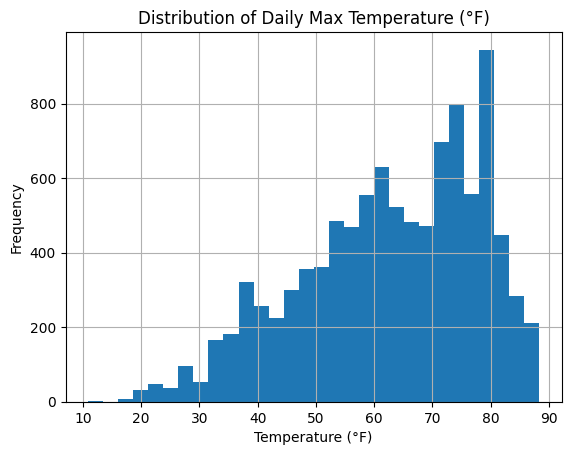

In [21]:
import matplotlib.pyplot as plt

merged_df['avg_temp_f'].plot(kind='hist', bins=30, title='Distribution of Daily Max Temperature (°F)')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


In [22]:
import pandas as pd

# Step 1: Load the large CSV
df = pd.read_csv('laguardia_weather_observations.csv')

# Step 2: Check total rows and sample up to 5000 or less
n_rows = df.shape[0]
sample_size = min(5000, n_rows)  # ensures we don't ask for more than available

df_small = df.sample(n=sample_size, random_state=42)

# Step 3: Save the smaller version (overwrite original)
df_small.to_csv('laguardia_weather_observations.csv', index=False)

print(f"✅ Saved smaller CSV with {sample_size} rows!")


✅ Saved smaller CSV with 164 rows!
